In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [253]:
image = cv.imread('tmp_image/0004.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
binary = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)[1]
binary.astype(np.uint8)
# blurred = cv.blur(image, (9, 9))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

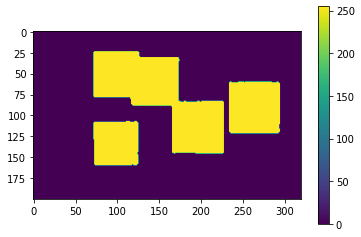

In [254]:
plt.imshow(binary)
plt.colorbar()

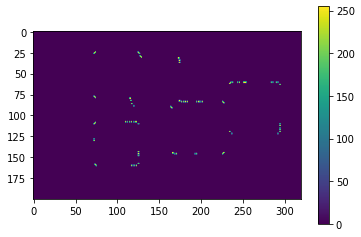

In [255]:
def HarrisDetect(img):
    dst = cv.cornerHarris(img, 2, 3, 0.02)
    new_img = np.zeros_like(img)
    new_img[dst > 0.1*dst.max()] = 255
    return new_img, np.array(np.where(dst > 0.1*dst.max())).transpose()
corner, points = HarrisDetect(gray)
plt.imshow(corner)
plt.colorbar()

In [256]:
dist_x = points[:, 0].reshape(-1, 1) - points[:, 0].reshape(1, -1)
dist_y = points[:, 1].reshape(-1, 1) - points[:, 1].reshape(1, -1)


In [257]:
th = 3
diag_point_pairs1 = np.array(np.where(np.abs(dist_x - dist_y) <= th)).transpose()
diag_point_pairs2 = np.array(np.where(np.abs(dist_x + dist_y) <= th)).transpose()
diag_point_pairs = np.concatenate([diag_point_pairs1, diag_point_pairs2], axis=0)

In [258]:
len(diag_point_pairs)

3170

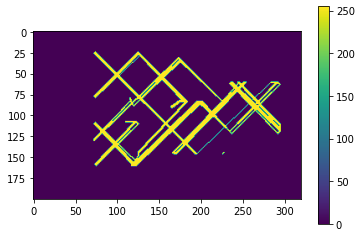

In [259]:
draft = corner.copy()
diag_point_pairs_no_self_loop = []
for pair in diag_point_pairs:
    if pair[0] == pair[1]:
        continue
    diag_point_pairs_no_self_loop.append(pair)
    cv.line(draft, (points[pair[0]][1], points[pair[0]][0]), (points[pair[1]][1], points[pair[1]][0]), color=(255, 0, 0))
plt.imshow(draft)
plt.colorbar()
    

In [260]:
def dist_point(px, py):
    return max(abs(px[0] - py[0]), abs(px[1] - py[1]))

def ordered(pair):
    if pair[0][0] > pair[1][0]:
        return (pair[1], pair[0])
    return pair

def dist_line(pairx, pairy):
    ordered_pairx = ordered(pairx)
    ordered_pairy = ordered(pairy)
    return max(
        dist_point(ordered_pairx[0], ordered_pairy[0]),
        dist_point(ordered_pairx[1], ordered_pairy[1]),
    )

def line_length(pair):
    return dist_point(pair[0], pair[1])
    

In [261]:
dist_line(([1,1], [10,10]), ([101,101], [110,110]))

100

In [262]:
merged_pairs = {}
min_dist = 10

for p in diag_point_pairs_no_self_loop:
    pair = ordered(((points[p[0]][1], points[p[0]][0]), (points[p[1]][1], points[p[1]][0])))
    if merged_pairs == {}:
        merged_pairs[0] = [pair]
    new_k = True
    for k, v in merged_pairs.items():
        add_k = True
        for pk in v:
            if dist_line(pk, pair) >= min_dist:
                add_k = False
                break
        if add_k:
            new_k = False
            merged_pairs[k].append(pair)
            break
    if new_k:
        merged_pairs[len(merged_pairs)] = [pair]
len(merged_pairs)

52

In [263]:
np.array(merged_pairs[0]).shape

(39, 2, 2)

In [264]:
import random
# sampled_merged_pairs = np.array([np.average(np.array(v), axis=0) for k, v in merged_pairs.items()])
sampled_merged_pairs = [v[0] for k, v in merged_pairs.items()]

In [265]:
sampled_merged_pairs

[((73, 25), (74, 24)),
 ((74, 24), (193, 145)),
 ((125, 24), (125, 25)),
 ((125, 24), (181, 83)),
 ((173, 31), (174, 31)),
 ((173, 31), (226, 83)),
 ((236, 60), (238, 60)),
 ((236, 60), (294, 115)),
 ((244, 60), (246, 60)),
 ((246, 60), (294, 110)),
 ((254, 60), (254, 61)),
 ((284, 60), (286, 60)),
 ((290, 60), (294, 63)),
 ((234, 62), (235, 61)),
 ((235, 61), (292, 121)),
 ((72, 77), (73, 77)),
 ((115, 79), (116, 79)),
 ((116, 82), (120, 89)),
 ((174, 82), (175, 82)),
 ((181, 83), (184, 83)),
 ((195, 83), (197, 83)),
 ((195, 83), (234, 119)),
 ((226, 83), (226, 84)),
 ((164, 89), (164, 90)),
 ((110, 107), (112, 107)),
 ((117, 107), (120, 107)),
 ((73, 109), (74, 108)),
 ((74, 108), (125, 157)),
 ((294, 110), (295, 110)),
 ((234, 119), (235, 119)),
 ((292, 121), (292, 122)),
 ((72, 128), (73, 128)),
 ((125, 143), (126, 143)),
 ((166, 144), (167, 144)),
 ((227, 144), (228, 144)),
 ((193, 145), (195, 145)),
 ((125, 157), (126, 157)),
 ((73, 158), (74, 158)),
 ((72, 77), (125, 24)),
 ((11

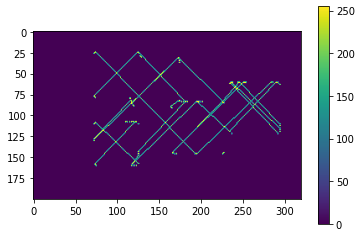

In [266]:
draft = corner.copy()

for pair in sampled_merged_pairs:
    cv.line(draft, np.int32(pair[0]), np.int32(pair[1]), color=(255, 0, 0))
plt.imshow(draft)
plt.colorbar()

In [267]:
lengths = [line_length(p) for p in sampled_merged_pairs]
np.array(lengths)

array([  1, 121,   1,  59,   1,  53,   2,  58,   2,  50,   1,   2,   4,
         1,  60,   1,   1,   7,   1,   3,   2,  39,   1,   1,   2,   3,
         1,  51,   1,   1,   1,   1,   1,   1,   1,   2,   1,   1,  53,
        56, 100,  23,  85,  89,  59,  46,  10,  60,  78,  61,  51,  11])

In [268]:
def diag_to_square(diag_pair):
    width = abs(diag_pair[0][0] - diag_pair[1][0])
    height = abs(diag_pair[0][1] - diag_pair[1][1])
    return (min(diag_pair[0][0], diag_pair[1][0]), min(diag_pair[0][1], diag_pair[1][1]), width, height)

def clean_pairs(merged_pairs, img):
    lengths = [line_length(p) for p in merged_pairs]
    cleaned_pairs = []
    for pair, length in zip(merged_pairs, lengths):
        if length <= 40 or length >= 80:
            continue
        center = (int((pair[0][1]+pair[1][1])/2), int((pair[0][0]+pair[1][0])/2))
        if not img[center]:
            continue
        binary = cv.threshold(img, 127, 255, cv.THRESH_BINARY)[1]
        rec = diag_to_square(pair)
        area = rec[2]*rec[3]
        rec_img = binary[rec[1]:rec[1]+rec[3], rec[0]:rec[0]+rec[2]]
        if rec_img.sum() / rec_img.max() <= 0.8* area:
            continue
        cleaned_pairs.append(pair)
    
    for i in range(len(cleaned_pairs)):
        if cleaned_pairs[i] is None:
            continue
        for j in range(i+1, len(cleaned_pairs)):
            if cleaned_pairs[j] is None:
                continue
            reci = diag_to_square(cleaned_pairs[i])
            recj = diag_to_square(cleaned_pairs[j])
            
            if reci[0] > recj[0] + recj[2] or\
               reci[1] > recj[1] + recj[3] or\
               reci[0] + reci[2] < recj[0] or\
               reci[1] + reci[3] < recj[1]:
                continue
            
            overlap_width = min(reci[0]+reci[2], recj[0]+recj[2]) - max(reci[0], recj[0])
            overlap_height = min(reci[1]+reci[3], recj[1]+recj[3]) - max(reci[1], recj[1])
            overlap = overlap_width*overlap_height
            areai = reci[2]*reci[3]
            areaj = recj[2]*recj[3]
            if overlap / (areai + areaj - overlap) >= 0.4:
                if areai < areaj:
                    cleaned_pairs[i] = cleaned_pairs[j]
                cleaned_pairs[j] = None
    return [p for p in cleaned_pairs if p is not None]

cleaned_pairs = clean_pairs(sampled_merged_pairs, binary)
len(cleaned_pairs)

5

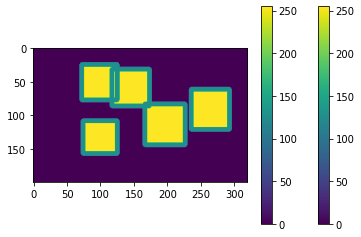

In [269]:
draft = corner.copy()
binary_copy = binary.copy()
for pair in cleaned_pairs:
    cv.line(draft, np.int32(pair[0]), np.int32(pair[1]), color=(255, 0, 0))
    cv.rectangle(binary_copy, np.int32(pair[0]), np.int32(pair[1]), color=(128, 0, 0), thickness=5)
plt.imshow(draft)
plt.colorbar()
plt.imshow(binary_copy)
plt.colorbar()